In [52]:
import pandas as pd 

df = pd.read_csv('ori/SaYoPillow.csv')

print(df.shape)
df

(630, 9)


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [53]:
features = {
    'sr' : 'snoring_rate', 
    'rr' : 'respiration_rate', 
    't' : 'body_temp', 
    'lm' : 'limb_movement', 
    'bo' : 'blood_oxygen', 
    'rem': 'eye_movement', 
    'sr.1': 'sleep_hours', 
    'hr' : 'heart_rate', 
    'sl' : 'stress_rate'
}

df.rename(columns=features, inplace=True)

df

,snoring_rate,respiration_rate,body_temp,limb_movement,blood_oxygen,eye_movement,sleep_hours,heart_rate,stress_rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [54]:
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temp           0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleep_hours         0
heart_rate          0
stress_rate         0
dtype: int64

In [55]:
df.columns

Index(['snoring_rate', 'respiration_rate', 'body_temp', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleep_hours', 'heart_rate',
       'stress_rate'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temp         630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleep_hours       630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_rate       630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


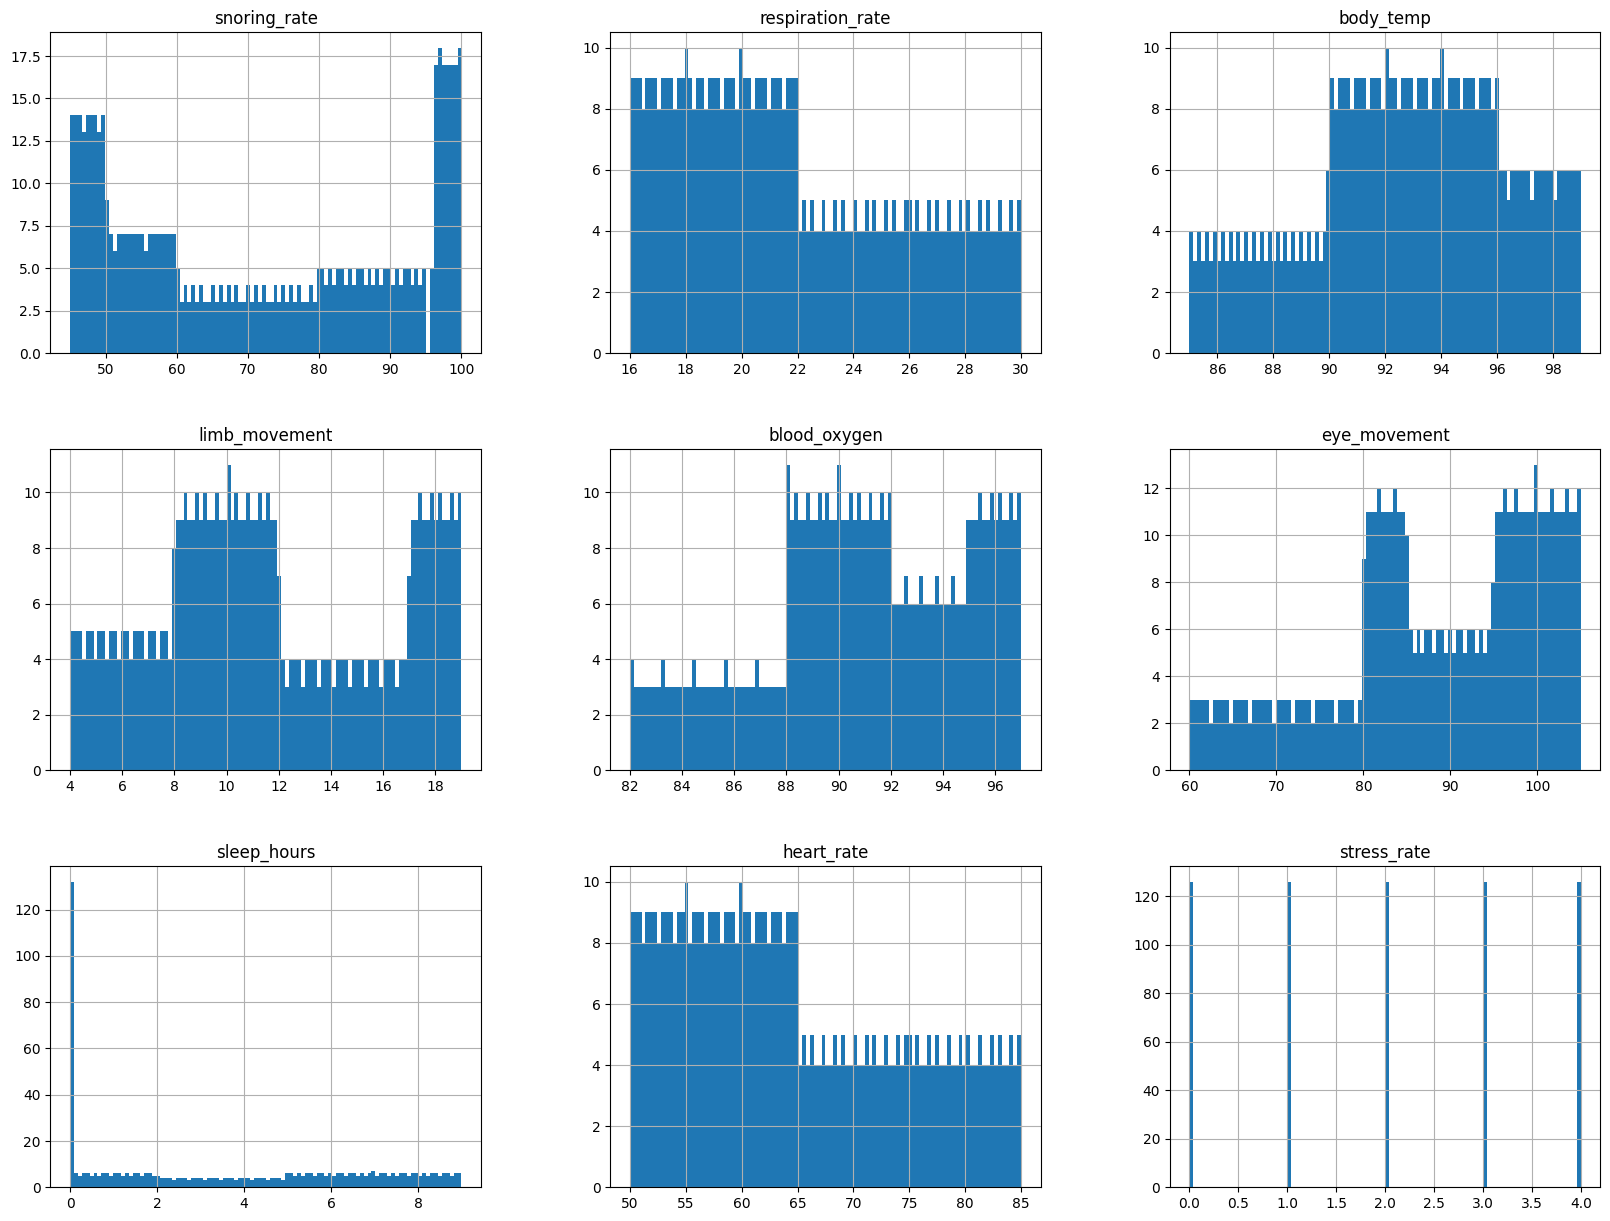

In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns 

df.hist(bins=100, figsize=(20, 15))
plt.show()

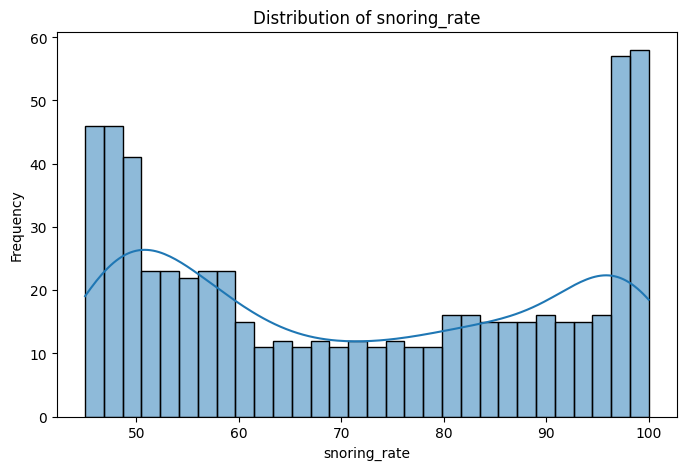

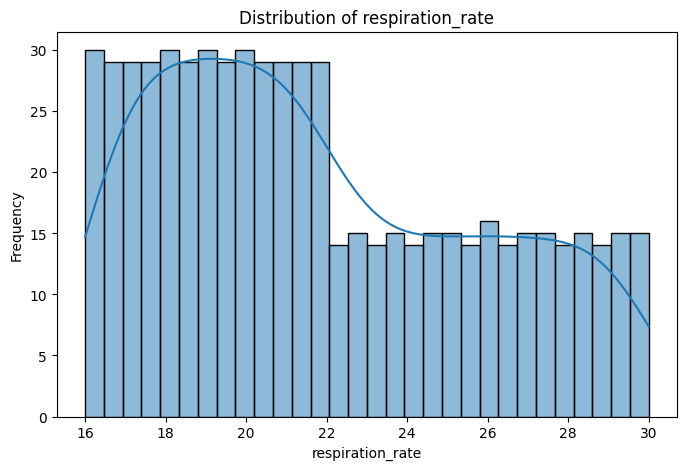

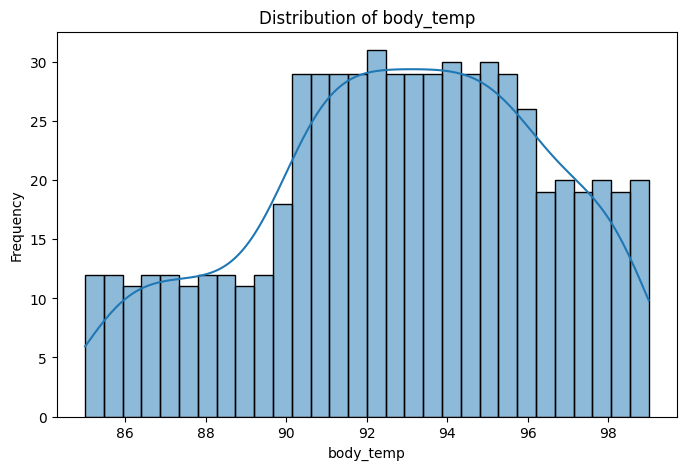

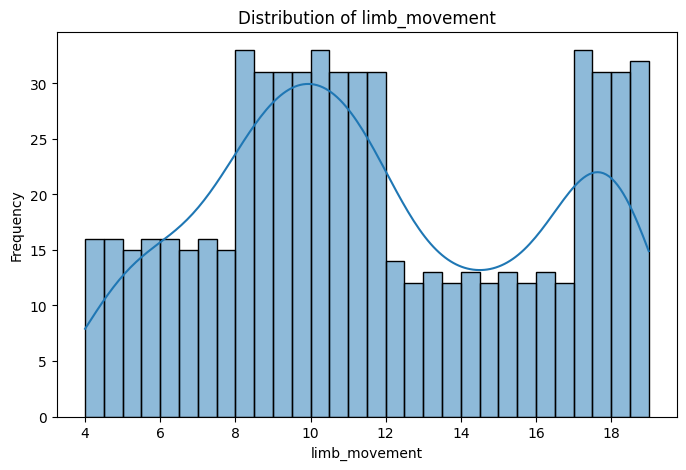

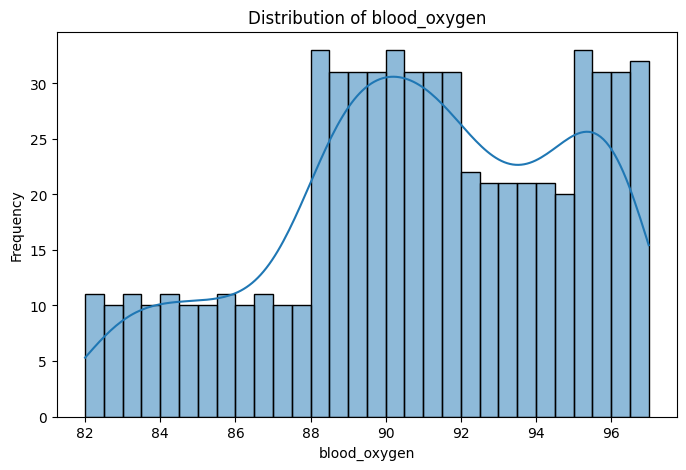

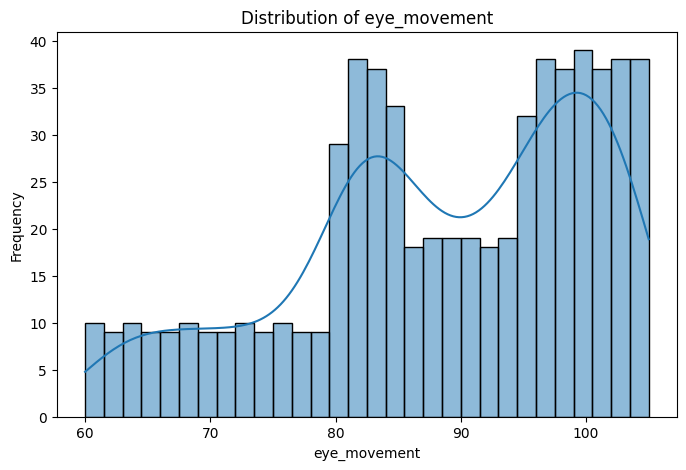

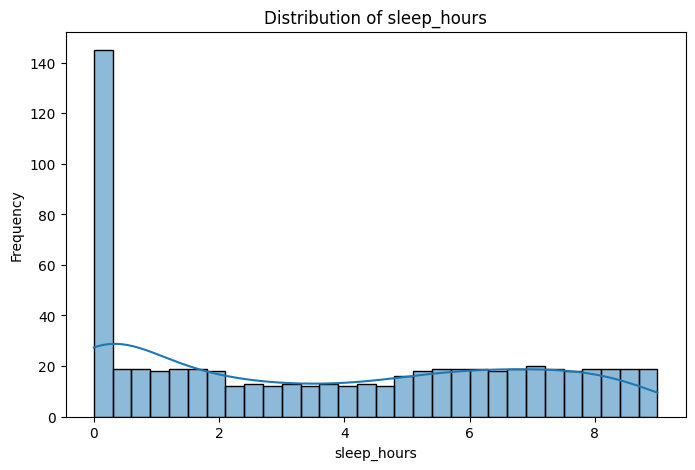

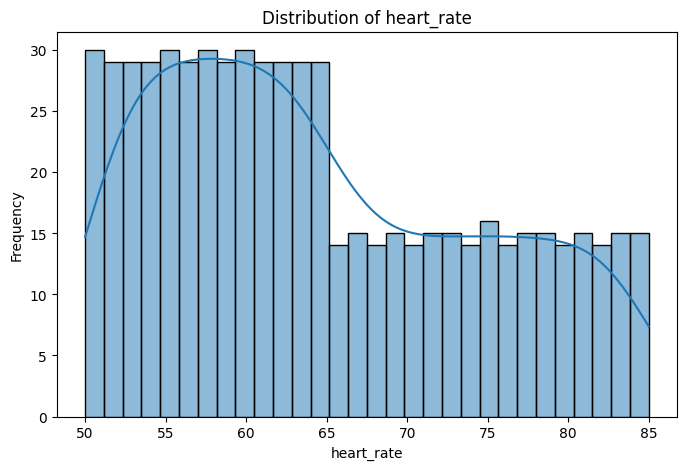

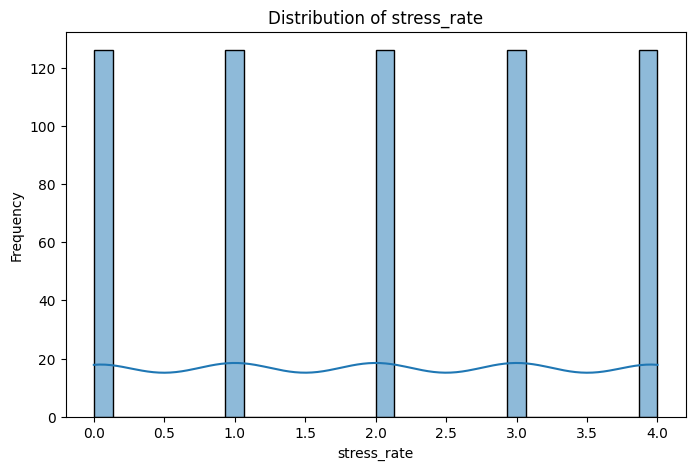

In [58]:
# sns.pairplot(df, diag_kind='kde')
features = [
    'snoring_rate', 'respiration_rate', 'body_temp',
    'limb_movement', 'blood_oxygen', 'eye_movement',
    'sleep_hours', 'heart_rate', 'stress_rate'
]

# Create histograms with KDE for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

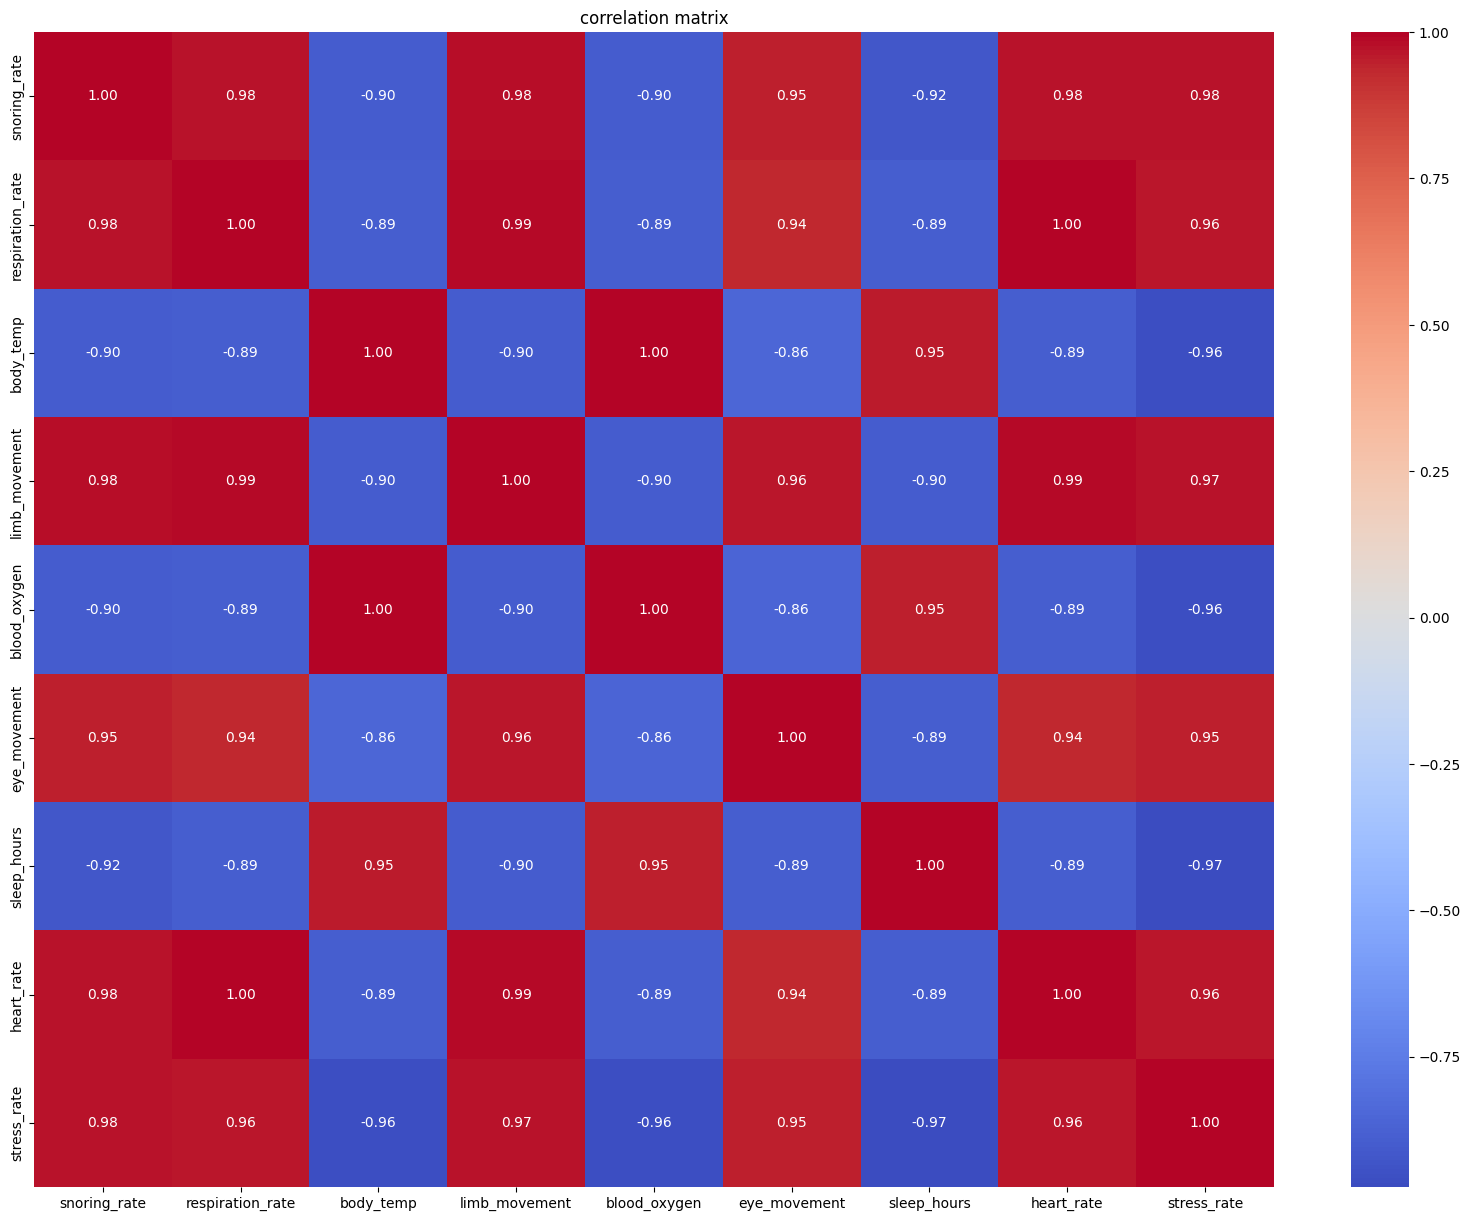

In [59]:
corr_mat = df.corr() 

plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix')
plt.show()

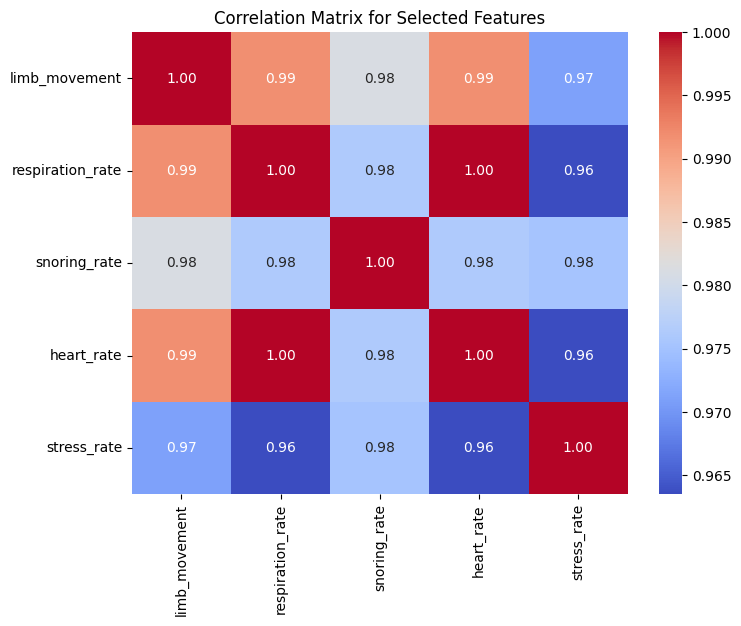

In [60]:
selected_features = ['limb_movement', 'respiration_rate', 'snoring_rate', 'heart_rate', 'stress_rate']

selected_corr_matrix = df[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()

In [61]:
df.stress_rate.unique()

array([3, 1, 0, 2, 4])

In [62]:
# Create a copy of the original DataFrame
saved_df = df.copy()

# Map the values in 'stress_rate' to strings
saved_df['stress_rate'] = saved_df['stress_rate'].map({
    0: 'low/normal',
    1: 'medium_low',
    2: 'medium',
    3: 'medium_high',
    4: 'high/unhealthy'
})

# Save the updated DataFrame to a CSV file
saved_df.to_csv('dataset/sayopillow.csv', index=False)

In [63]:
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split

x = df.drop(columns=['stress_rate'])
y = df['stress_rate']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

train_data = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='stress_rate')
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='stress_rate')

tfdf_rf = tfdf.keras.RandomForestModel()

tfdf_rf.fit(train_data)
tfdf_rf.compile(metrics=['accuracy'])
print(tfdf_rf.evaluate(test_data))

(567, 8) (63, 8)
(567,) (63,)
Use /tmp/tmpgwv84kjn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.159351. Found 567 examples.
Training model...
Model trained in 0:00:00.044219
Compiling model...
Model compiled.


[INFO 24-11-02 23:55:28.3270 CST kernel.cc:1233] Loading model from path /tmp/tmpgwv84kjn/model/ with prefix 909467559a364c50
[INFO 24-11-02 23:55:28.3335 CST decision_forest.cc:660] Model loaded with 300 root(s), 3006 node(s), and 8 input feature(s).
[INFO 24-11-02 23:55:28.3335 CST abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-11-02 23:55:28.3335 CST kernel.cc:1061] Use fast generic engine


1/1 [==============================] - 0s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[0.0, 1.0]


In [64]:
print(tfdf_rf.learner_params)

{'adapt_bootstrap_size_ratio_for_maximum_training_duration': False, 'allow_na_conditions': False, 'bootstrap_size_ratio': 1.0, 'bootstrap_training_dataset': True, 'categorical_algorithm': 'CART', 'categorical_set_split_greedy_sampling': 0.1, 'categorical_set_split_max_num_items': -1, 'categorical_set_split_min_item_frequency': 1, 'compute_oob_performances': True, 'compute_oob_variable_importances': False, 'growing_strategy': 'LOCAL', 'honest': False, 'honest_fixed_separation': False, 'honest_ratio_leaf_examples': 0.5, 'in_split_min_examples_check': True, 'keep_non_leaf_label_distribution': True, 'max_depth': 16, 'max_num_nodes': None, 'maximum_model_size_in_memory_in_bytes': -1.0, 'maximum_training_duration_seconds': -1.0, 'min_examples': 5, 'missing_value_policy': 'GLOBAL_IMPUTATION', 'num_candidate_attributes': 0, 'num_candidate_attributes_ratio': -1.0, 'num_oob_variable_importances_permutations': 1, 'num_trees': 300, 'pure_serving_model': False, 'random_seed': 123456, 'sampling_with

In [65]:
tuner = tfdf.tuner.RandomSearch(num_trials=10, use_predefined_hps=True)
tuned_model = tfdf.keras.RandomForestModel(tuner=tuner)

tuned_model.fit(train_data, verbose=2)

tfdf_rf.compile(metrics=['accuracy'])
print(tfdf_rf.evaluate(test_data))

Use /tmp/tmplywf57ha as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'snoring_rate': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'respiration_rate': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'body_temp': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'limb_movement': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'blood_oxygen': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'eye_movement': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'sleep_hours': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'heart_rate': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>}
Label: Tensor("data_8:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'snoring_rate': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'respiration_rate': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=fl

In [66]:
print(tuned_model.learner_params)

{'adapt_bootstrap_size_ratio_for_maximum_training_duration': False, 'allow_na_conditions': False, 'bootstrap_size_ratio': 1.0, 'bootstrap_training_dataset': True, 'categorical_algorithm': 'CART', 'categorical_set_split_greedy_sampling': 0.1, 'categorical_set_split_max_num_items': -1, 'categorical_set_split_min_item_frequency': 1, 'compute_oob_performances': True, 'compute_oob_variable_importances': False, 'growing_strategy': 'LOCAL', 'honest': False, 'honest_fixed_separation': False, 'honest_ratio_leaf_examples': 0.5, 'in_split_min_examples_check': True, 'keep_non_leaf_label_distribution': True, 'max_depth': 16, 'max_num_nodes': None, 'maximum_model_size_in_memory_in_bytes': -1.0, 'maximum_training_duration_seconds': -1.0, 'min_examples': 5, 'missing_value_policy': 'GLOBAL_IMPUTATION', 'num_candidate_attributes': 0, 'num_candidate_attributes_ratio': -1.0, 'num_oob_variable_importances_permutations': 1, 'num_trees': 300, 'pure_serving_model': False, 'random_seed': 123456, 'sampling_with

In [67]:
params_dict = tuned_model.learner_params
tfdf_rf2 = tfdf.keras.RandomForestModel(**params_dict)
tfdf_rf2.fit(train_data, verbose=2)

tfdf_rf2.compile(metrics=['accuracy'])
print(tfdf_rf2.evaluate(test_data))

Use /tmp/tmpm_wo7jwf as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'snoring_rate': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'respiration_rate': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'body_temp': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'limb_movement': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'blood_oxygen': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'eye_movement': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'sleep_hours': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'heart_rate': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>}
Label: Tensor("data_8:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'snoring_rate': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'respiration_rate': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=fl

In [68]:
row_index = 22
single_row = x_test.iloc[[row_index]]

single_row_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(single_row, label=None)

# Make predictions for the selected row
y_pred_probs = tfdf_rf.predict(single_row_dataset)
print(y_pred_probs)

1/1 [==============================] - 0s 34ms/step
[[0.         0.         0.         0.99999917 0.        ]]


In [69]:
tuning_logs = tuned_model.make_inspector().tuning_logs()
tuning_logs.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
0,0.987654,2.684460,False,SPARSE_OBLIQUE,1.0,NONE,CONTINUOUS,RANDOM,true,25,40
1,0.987654,3.505729,False,SPARSE_OBLIQUE,1.0,MIN_MAX,CONTINUOUS,CART,true,20,10
2,1.000000,3.548888,True,SPARSE_OBLIQUE,3.0,NONE,CONTINUOUS,CART,true,30,2
3,0.996473,3.785014,False,SPARSE_OBLIQUE,2.0,NONE,BINARY,CART,true,20,10
4,1.000000,3.812293,False,SPARSE_OBLIQUE,5.0,MIN_MAX,BINARY,RANDOM,true,20,10


In [70]:
tuning_logs[tuning_logs.best].iloc[0]

score                                                  1.0
evaluation_time                                   3.548888
best                                                  True
split_axis                                  SPARSE_OBLIQUE
sparse_oblique_projection_density_factor               3.0
sparse_oblique_normalization                          NONE
sparse_oblique_weights                          CONTINUOUS
categorical_algorithm                                 CART
winner_take_all                                       true
max_depth                                               30
min_examples                                             2
Name: 2, dtype: object

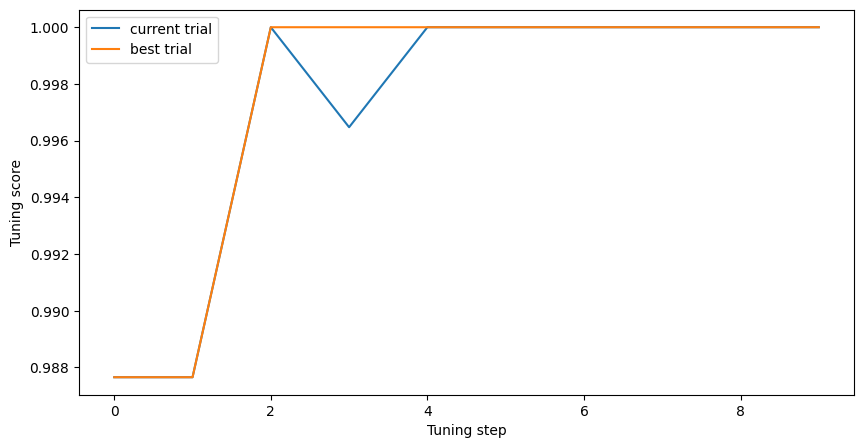

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

1/1 [==============================] - 0s 34ms/step
Confusion Matrix:
[[11  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 16]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        16

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



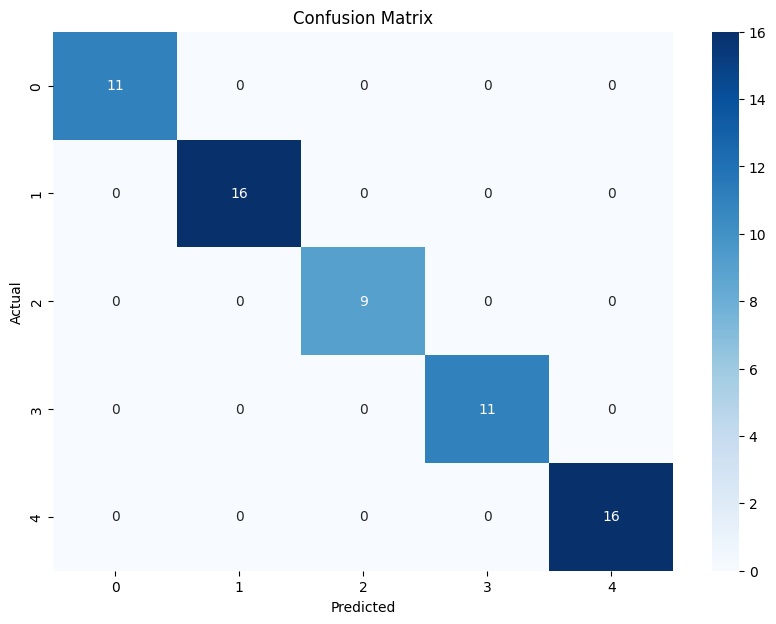

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_probs = tfdf_rf.predict(test_data)
y_pred = y_pred_probs.argmax(axis=1)

y_test = y_test.to_numpy()  
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [73]:
y_train.dtype

dtype('int64')

In [74]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import RepeatedStratifiedKFold

# create base model
def create_model(params):
    model = Sequential([
        Dense(params.get('units_1', 128), activation='relu', input_shape=(x_train.shape[1],)),
        Dropout(params.get('dropout_1', 0.0)),
        Dense(params.get('units_2', 64), activation='relu'),
        Dropout(params.get('dropout_2', 0.0)),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(
        optimizer=params.get('optimizer', 'adam'),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

# Use cross-validation with a Keras wrapper
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)

# Initialize a list to store the scores
scores = []

for train_idx, val_idx in cv.split(x_train, y_train):
    # Split the data into training and validation sets
    x_cv_train, x_cv_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Create a new model instance for each fold
    params = {}
    model = create_model(params)

    # Train the model on the current fold
    model.fit(x_cv_train, y_cv_train, epochs=10, verbose=1)  # Use verbose=0 for no output

    # Generate predictions (probabilities) for the validation set
    predictions = model.predict(x_cv_val)

    # Use argmax to get class predictions
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Calculate accuracy for the current fold
    accuracy = np.mean(predicted_classes == y_cv_val)
    scores.append(accuracy)

# Print out the average accuracy and standard deviation
print(f'Average accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 6.1759 - accuracy: 0.4255
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 1.0261 - accuracy: 0.6627
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7784
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8784
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.9255
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.9784
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9686
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.9373
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9706
Epoch 10/10
2/2 [==============================] - 0s 3ms/step
Epoch 1/10
16/16 [==============================] - 0s 

1/1 [==============================] - 0s 45ms/step
Sample input prediction: [[2.1527502e-09 3.6408670e-05 4.3327051e-05 3.1045187e-02 9.6887511e-01]]
Predicted class: 4
2/2 [==============================] - 0s 3ms/step
Confusion Matrix:
[[10  1  0  0  0]
 [ 0 16  0  0  0]
 [ 0  1  8  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 16]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.89      1.00      0.94        16
           2       1.00      0.89      0.94         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        16

    accuracy                           0.97        63
   macro avg       0.98      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63



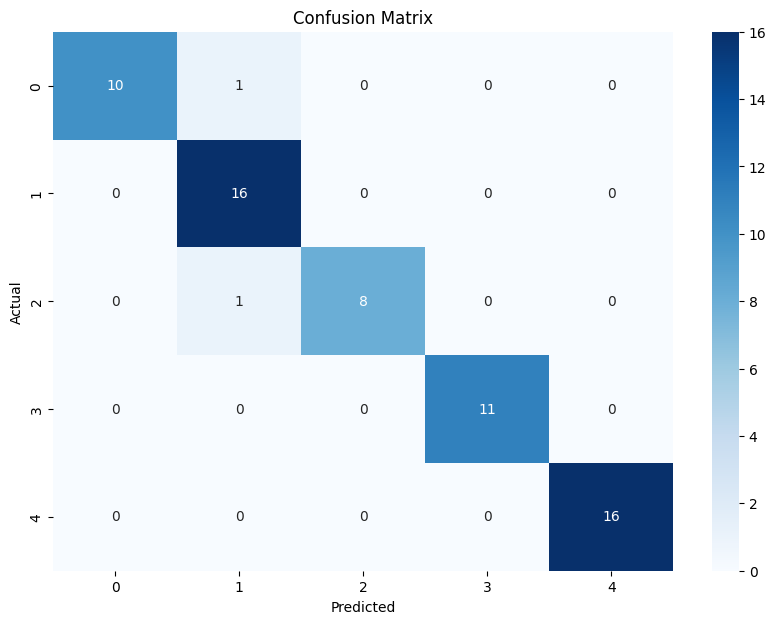

In [75]:
def test(model, n): 
    
    model.fit(x_train, y_train.values, epochs = 12, verbose = 0)
        
    sample_input = x_test.iloc[n].values.reshape(1, -1)

    # Make a prediction
    sample_prediction = model.predict(sample_input)
    predicted_class = np.argmax(sample_prediction)

    # Print the prediction
    print("Sample input prediction:", sample_prediction)
    print("Predicted class:", predicted_class)

    test_preds = model.predict(x_test)
    predicted_classes_test = np.argmax(test_preds, axis=1)

    conf_matrix = confusion_matrix(y_test, predicted_classes_test)
    class_report = classification_report(y_test, predicted_classes_test)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()      
        
params = {}
baseline_model = create_model(params)
test(baseline_model, 0)

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
import keras_tuner as kt  # Import Keras Tuner

# Define a model creation function for Keras Tuner
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the first Dense layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(x_train.shape[1],)
    ))
    # Optionally add Dropout to prevent overfitting
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Tune the number of units in the second Dense layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  
    executions_per_trial=1,  
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Use cross-validation with a Keras wrapper
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)

# Initialize a list to store the scores
scores = []

# Perform cross-validation
for train_idx, val_idx in cv.split(x_train, y_train):
    # Split the data into training and validation sets
    x_cv_train, x_cv_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Search for the best hyperparameters
    tuner.search(x_cv_train, y_cv_train, epochs=10, validation_data=(x_cv_val, y_cv_val), verbose=1)
    
    # Get the best model from the tuner
    best_model = tuner.get_best_models(num_models=1)[0]

    # Evaluate the model on the validation set
    predictions = best_model.predict(x_cv_val)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Calculate accuracy for the current fold
    accuracy = np.mean(predicted_classes == y_cv_val)
    scores.append(accuracy)

# Print out the average accuracy and standard deviation
print(f'Average accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

Trial 34 Complete [00h 00m 02s]
val_accuracy: 0.21052631735801697

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 29m 14s
2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 6ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step
Average accuracy: 0.9912 +/- 0.0118


Best Hyperparameters:
units_1: 192
dropout_1: 0.2
units_2: 128
dropout_2: 0.0
optimizer: adam


1/1 [==============================] - 0s 67ms/step
Sample input prediction: [[1.5000648e-23 3.0789290e-17 4.8081979e-08 5.8856467e-04 9.9941134e-01]]
Predicted class: 4
2/2 [==============================] - 0s 3ms/step
Confusion Matrix:
[[11  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 16]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        16

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



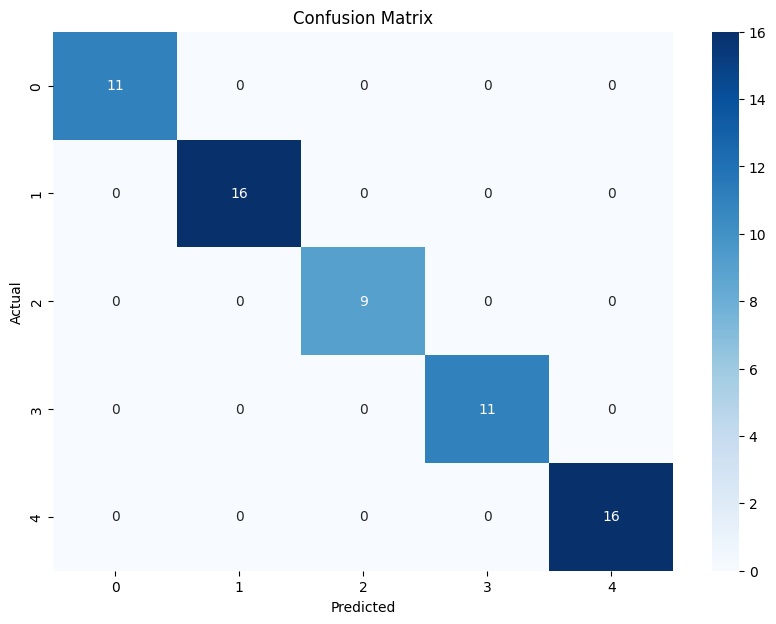

In [77]:
# Get the best hyperparameters from the tuner
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print out the best hyperparameters
print("Best Hyperparameters:")
print(f"units_1: {best_hyperparameters.get('units_1')}")
print(f"dropout_1: {best_hyperparameters.get('dropout_1')}")
print(f"units_2: {best_hyperparameters.get('units_2')}")
print(f"dropout_2: {best_hyperparameters.get('dropout_2')}")
print(f"optimizer: {best_hyperparameters.get('optimizer')}")

# Create a dictionary from the best hyperparameters
best_params = {
    'units_1': best_hyperparameters.get('units_1'),
    'dropout_1': best_hyperparameters.get('dropout_1'),
    'units_2': best_hyperparameters.get('units_2'),
    'dropout_2': best_hyperparameters.get('dropout_2'),
    'optimizer': best_hyperparameters.get('optimizer')
}

# Pass the dictionary to the create_model function to get the best model
best_model = create_model(best_params)

test(best_model, 0)